In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller 
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates

In [14]:
import warnings
warnings.filterwarnings("ignore")

# Analisis Preliminar Datos para ML - Series de Tiempo

In [ ]:
diario = pd.read_csv('raw/diario_ext.csv')
diario['pickup_datetime'] = pd.to_datetime(diario['pickup_datetime'])
diario.set_index('pickup_datetime', inplace=True)

In [9]:
diario

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-01,132487,176853.39,1477232.33,1.114175e+06,98010
2022-03-02,139160,187249.09,1558147.97,1.167082e+06,103464
2022-03-03,151337,199509.40,1682571.12,1.267075e+06,111489
2022-03-04,153467,199166.94,1675753.66,1.270830e+06,110500
2022-03-05,154483,201146.77,1572586.77,1.168040e+06,105113
...,...,...,...,...,...
2024-08-27,91633,120296.62,1418567.88,8.241690e+05,73266
2024-08-28,101202,130843.35,1570150.82,9.204025e+05,81088
2024-08-29,96395,124708.58,1498053.45,8.947159e+05,76483


In [5]:
semanal = diario.resample('W').sum()

In [11]:
semanal

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-06,845509,1118855.30,9109162.06,6.773596e+06,607096
2022-03-13,960643,1260253.09,10348709.82,7.693147e+06,691579
2022-03-20,931679,1240380.09,10020839.88,7.464265e+06,664440
2022-03-27,969437,1288200.40,10368437.91,7.627773e+06,694129
2022-04-03,1006507,1335385.39,10920478.20,8.116997e+06,727112
...,...,...,...,...,...
2024-08-04,729663,929005.11,11085052.73,6.587277e+06,569347
2024-08-11,694209,892107.94,10652686.93,6.345388e+06,545072
2024-08-18,649747,834644.35,9697601.11,5.644428e+06,503388


In [4]:
mensual = diario.resample('M').sum()

C:\Users\Carolina\AppData\Local\Temp\ipykernel_14616\3733715714.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensual = diario.resample('M').sum()


In [14]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [15]:
mensual.shape[0]

30

## Datos en bruto

### Estacionalidad

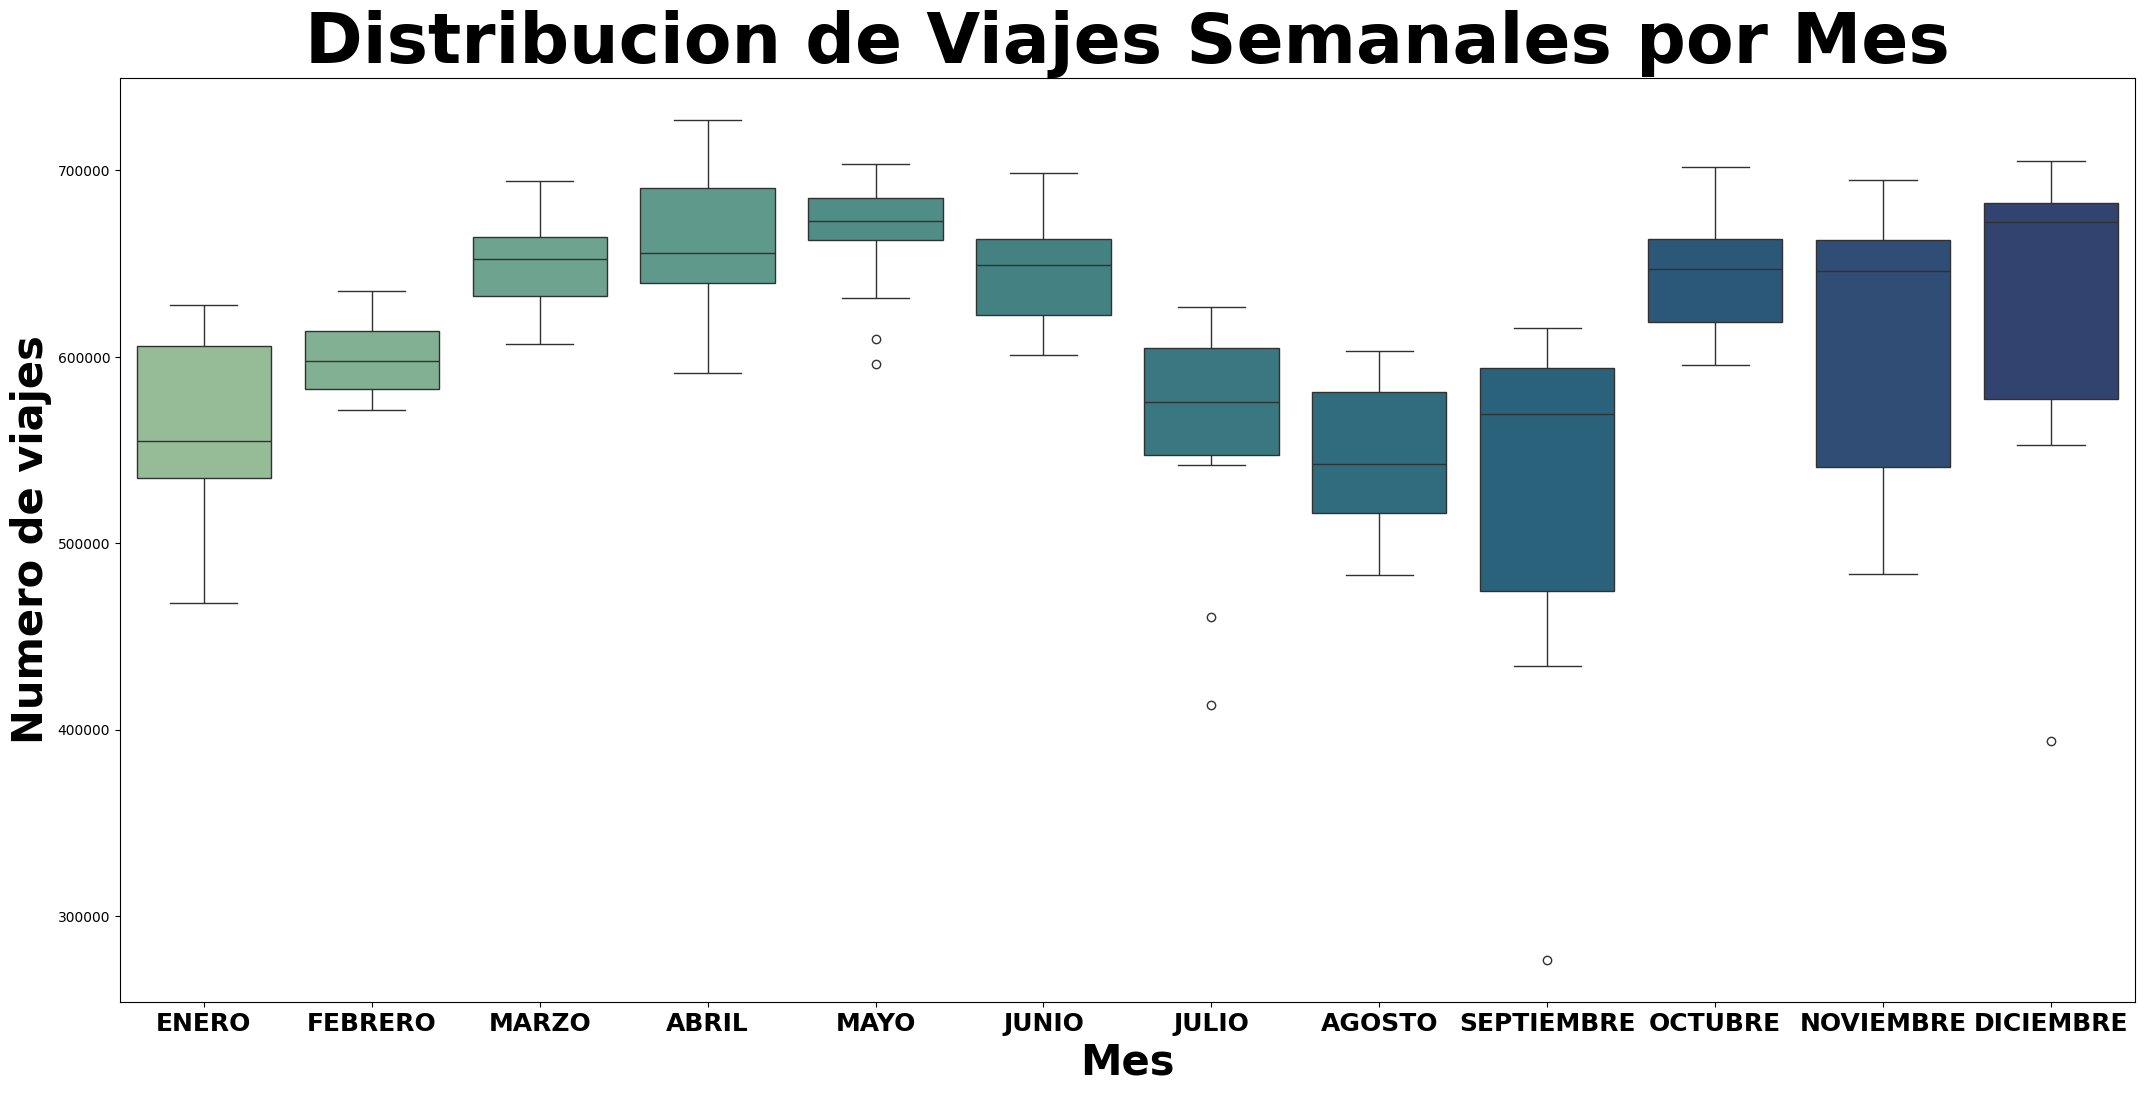

In [16]:
plt.figure(figsize = (26,12))
sns.boxplot(data=semanal,x=semanal.index.month,y= semanal.n_trips, palette='crest')
plt.title('Distribucion de Viajes Semanales por Mes',fontsize = 50,fontweight='bold')
plt.xlabel('Mes',fontsize = 30,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 30,fontweight='bold')
plt.xticks(ticks=range(0,12), labels=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'], fontsize = 18,fontweight='bold')
plt.show()

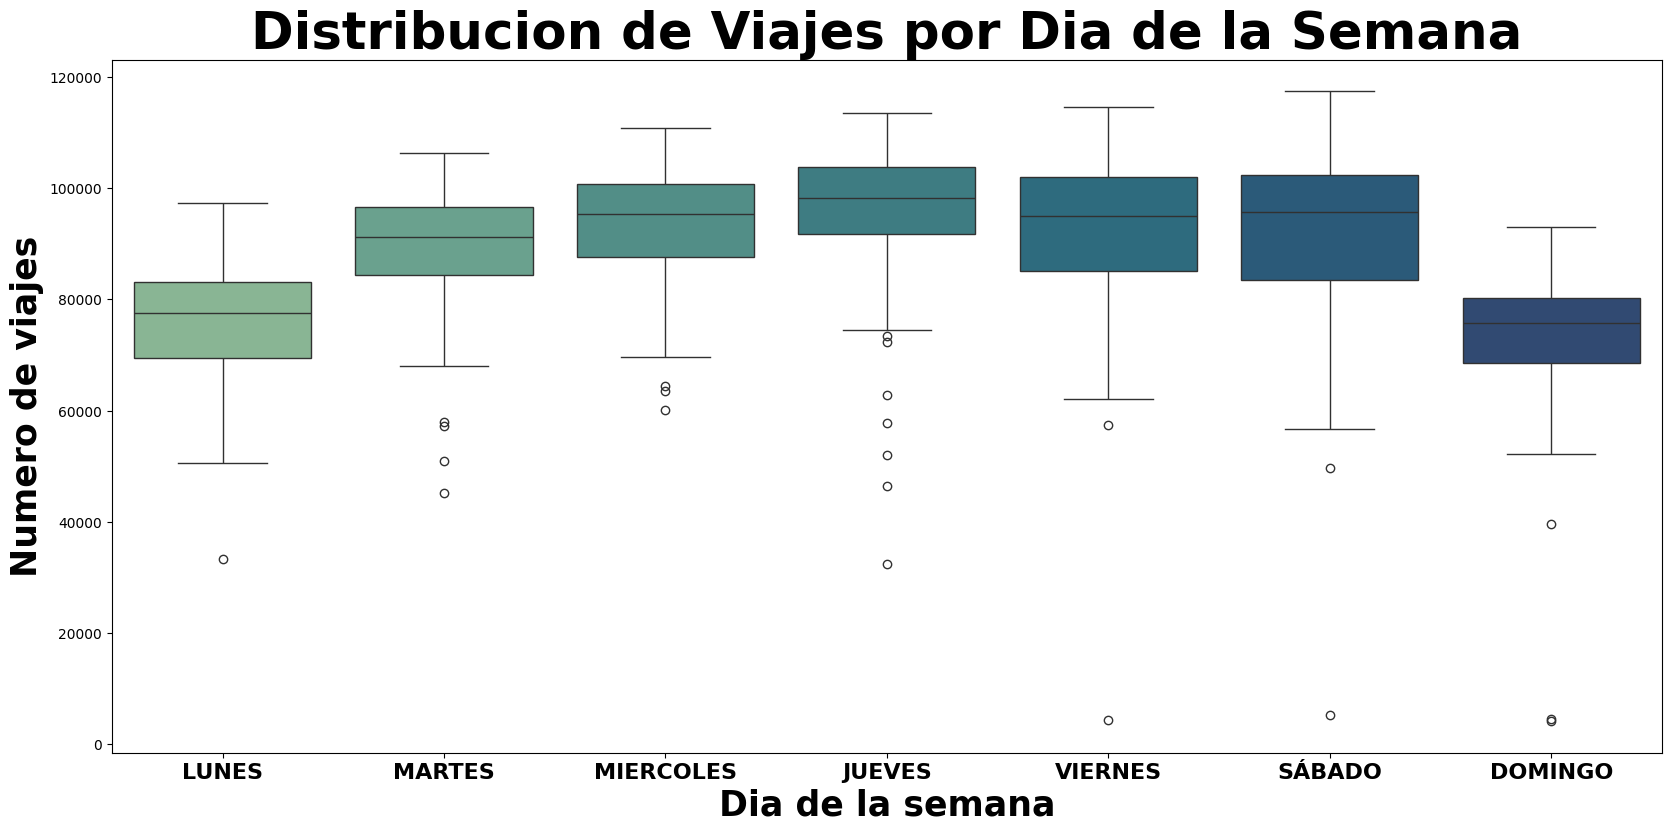

In [17]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.weekday,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Viajes por Dia de la Semana',fontsize = 37,fontweight='bold')
plt.xlabel('Dia de la semana',fontsize = 25,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 25,fontweight='bold')
plt.xticks(ticks=range(0,7), labels=['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES','SÁBADO','DOMINGO'],fontsize = 16,fontweight='bold')
plt.show()

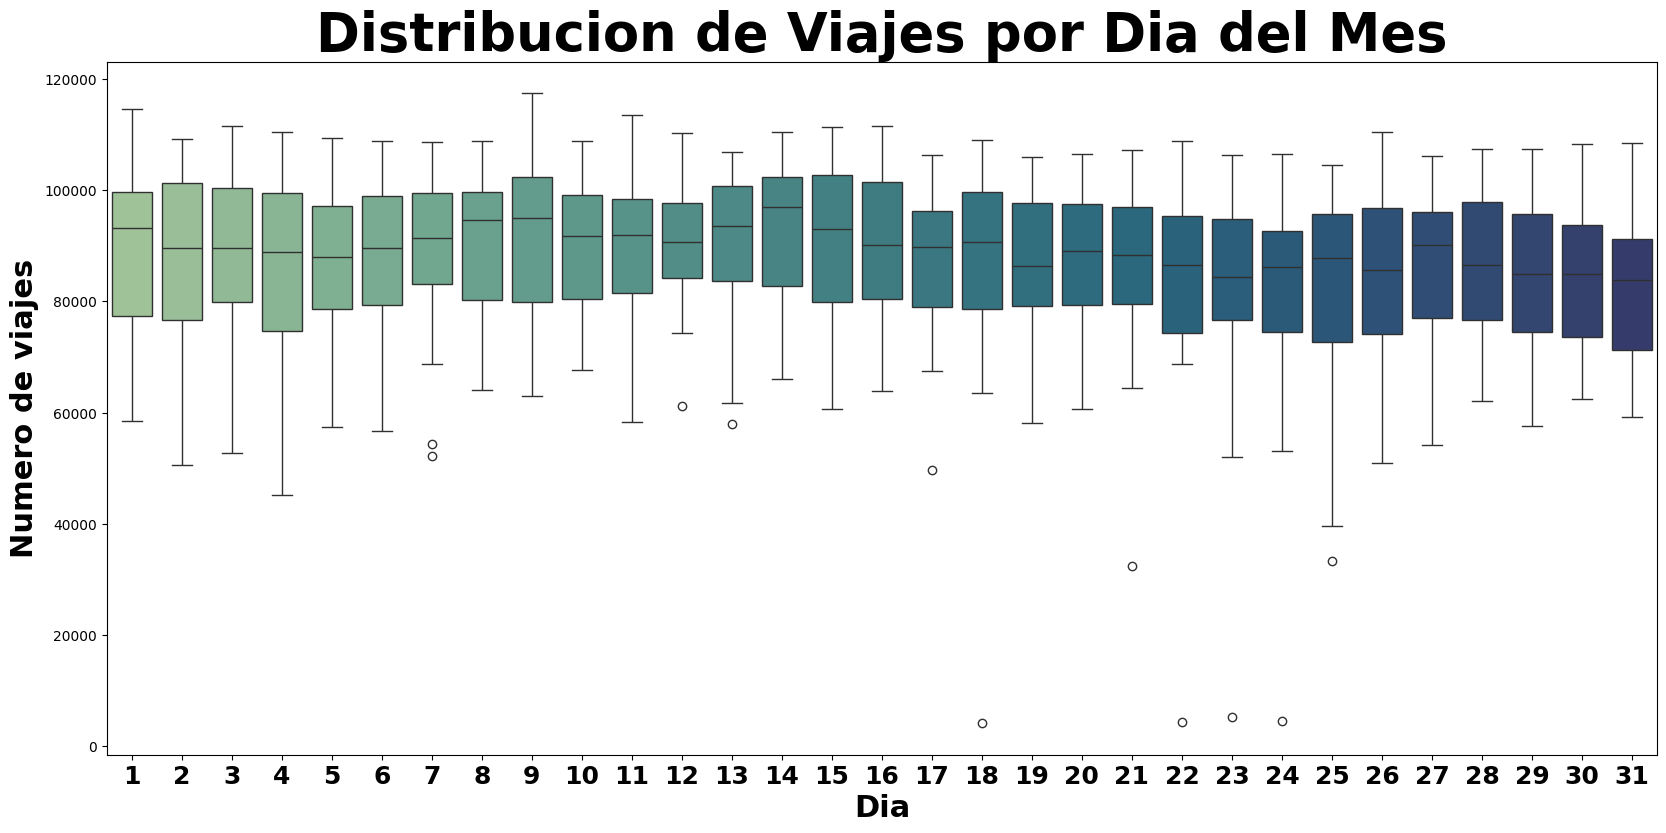

In [18]:
plt.figure(figsize = (20,9))
sns.boxplot(data=diario,x=diario.index.day,y= diario.n_trips, palette='crest')
plt.title('Distribucion de Viajes por Dia del Mes',fontsize = 38,fontweight='bold')
plt.xlabel('Dia',fontsize = 22,fontweight='bold')
plt.ylabel('Numero de viajes',fontsize = 22,fontweight='bold')
plt.xticks(fontsize = 18,fontweight='bold')
plt.show()

### Tendencia

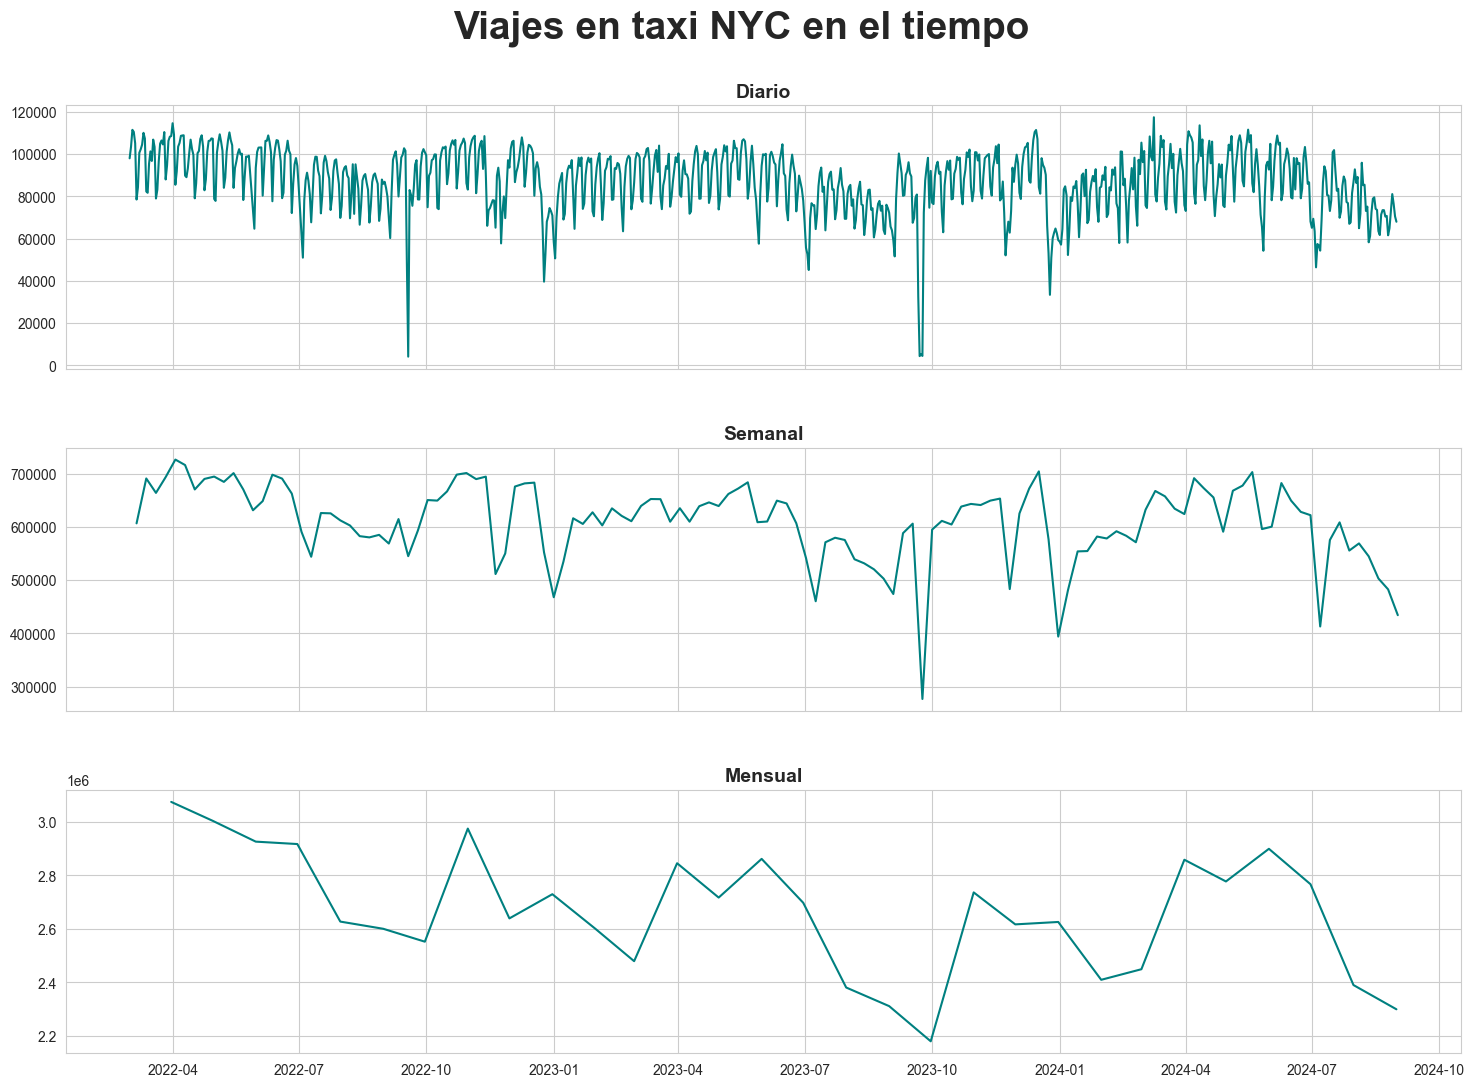

In [19]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ax[2].plot(mensual.index, mensual.n_trips, color='teal')
ax[2].set_title('Mensual',fontsize=14, fontweight='bold')

ax[1].plot(semanal.index, semanal.n_trips, color='teal')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')

ax[0].plot(diario.index, diario.n_trips, color='teal')
ax[0].set_title('Diario',fontsize=14, fontweight='bold')



plt.show()

In [ ]:
ventana = (35)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()

ventana = (20)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()

ventana = (9)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()

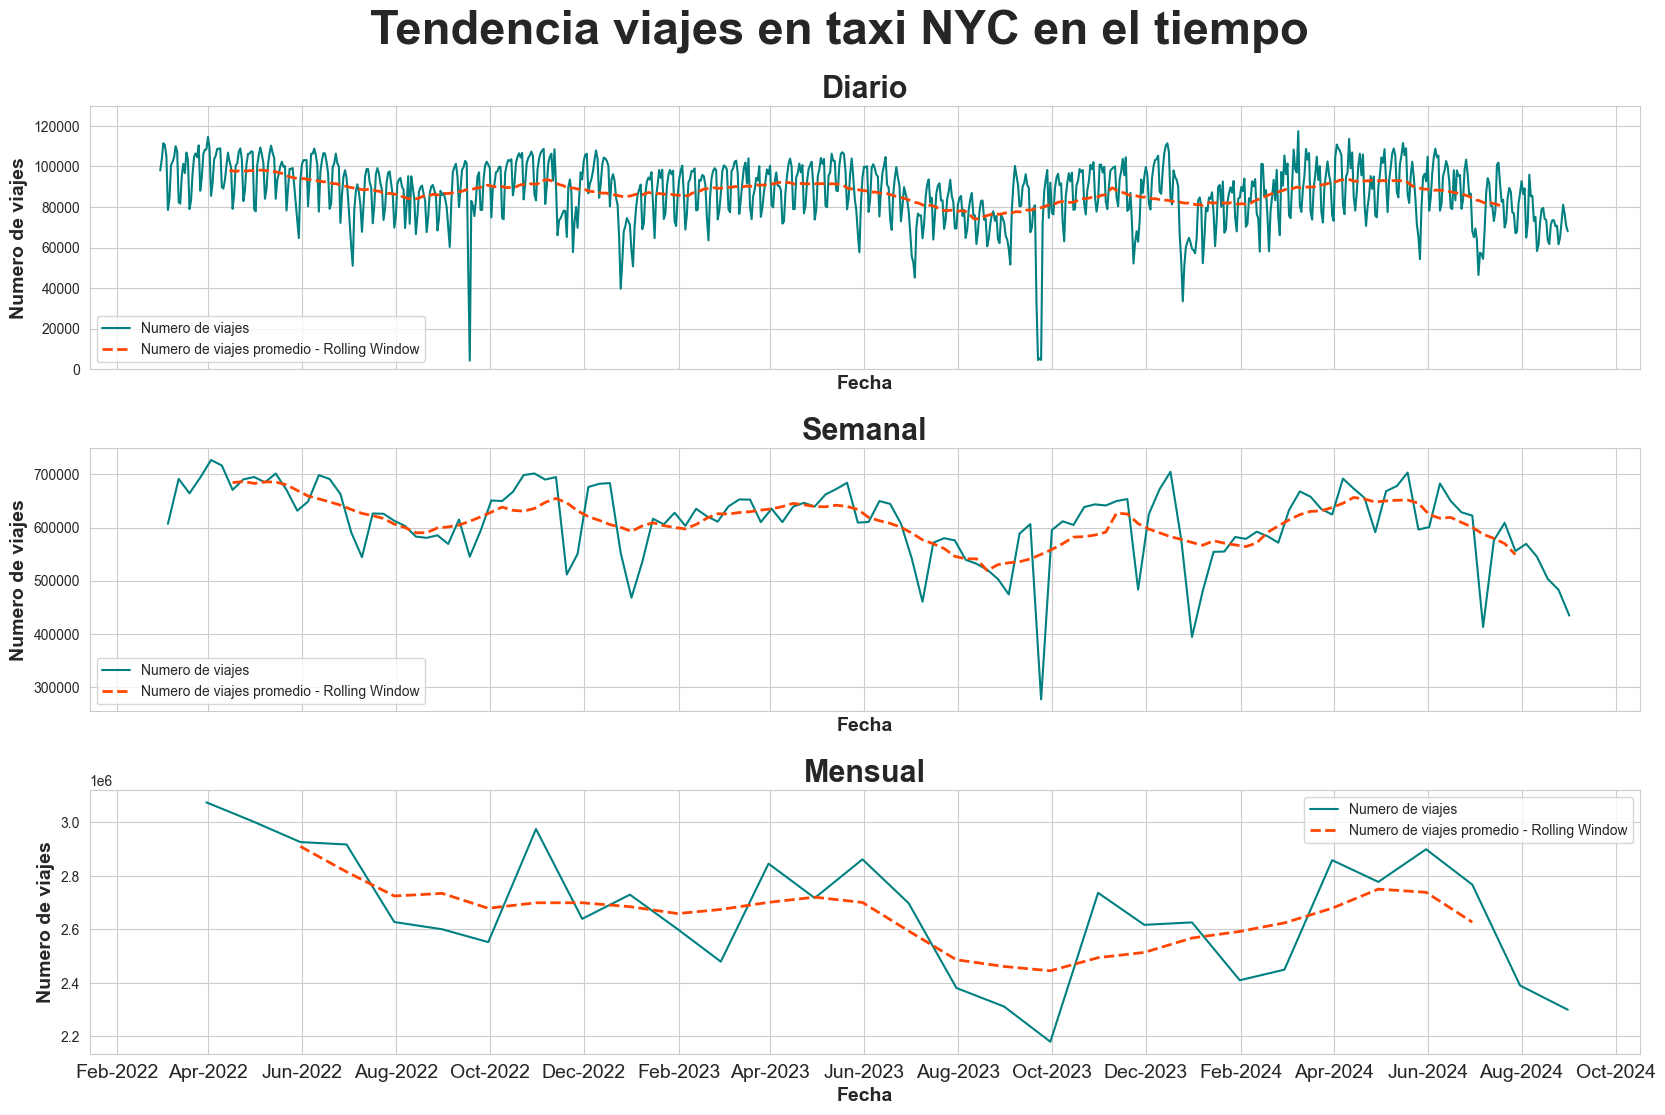

In [6]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (20,12), gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)
fig.suptitle("Tendencia viajes en taxi NYC en el tiempo",fontsize=34, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ax[-1].tick_params(axis='x', labelsize=14)
ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 

ventana = (90)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='orangered')
ax[0].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[0].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[0].set_title('Diario',fontsize=22, fontweight='bold')
ax[0].set_ylim(0,130000)
ax[0].legend()

ventana = (12)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()
ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='orangered')
ax[1].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[1].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[1].set_title('Semanal',fontsize=22, fontweight='bold')
ax[1].legend()

ventana = (5)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[2].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[2].plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='orangered')
ax[2].set_xlabel('Fecha',fontsize=14, fontweight='bold')
ax[2].set_ylabel('Numero de viajes',fontsize=14, fontweight='bold')
ax[2].set_title('Mensual',fontsize=22, fontweight='bold')
ax[2].legend()


plt.show()

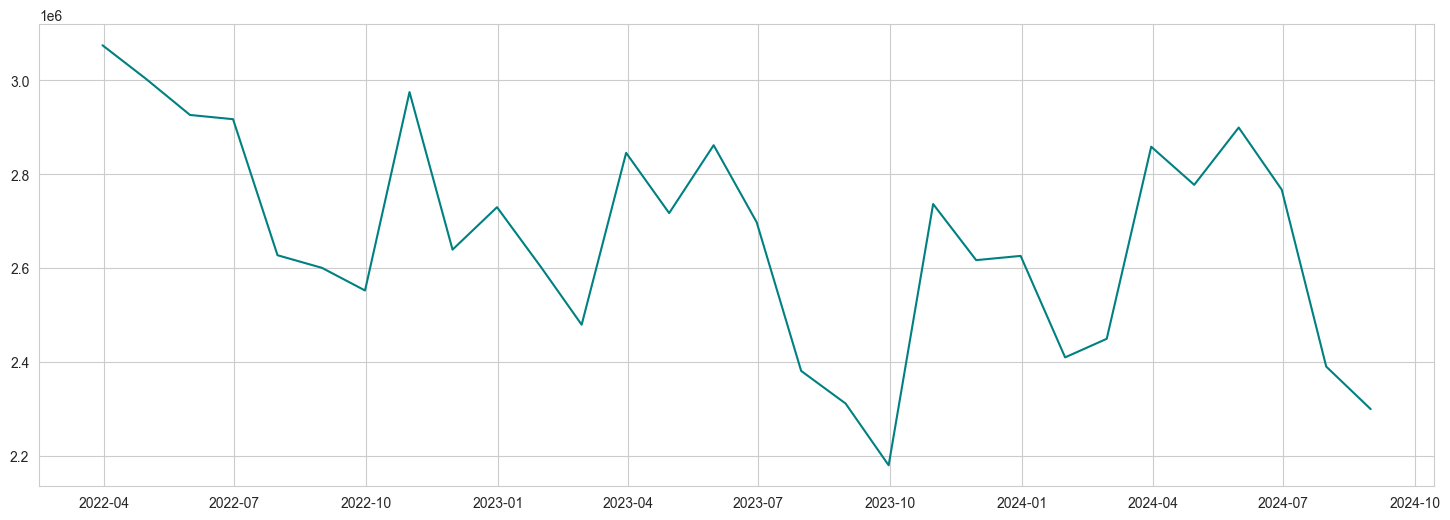

In [10]:
plt.figure(figsize=(18,6))
plt.plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')

### Estacionariedad

In [33]:
#H0: No es estacionaria
#H1: Es estacionaria
def adfuller_test(trips):
    result = adfuller(trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('Es estacionaria.')
    else:
        print('No es estacionaria.')

In [34]:
adfuller_test(diario.n_trips)

ADF Test Statistic : -4.259192846784841
p-value : 0.0005223171773050355
#Lags Used : 21
Number of Observations Used : 893
Es estacionaria.


In [35]:
adfuller_test(semanal.n_trips)

ADF Test Statistic : -3.3725681206078955
p-value : 0.011930335091155736
#Lags Used : 9
Number of Observations Used : 121
Es estacionaria.


In [36]:
adfuller_test(mensual.n_trips)

ADF Test Statistic : -1.7431880032854776
p-value : 0.40900921939177587
#Lags Used : 5
Number of Observations Used : 24
No es estacionaria.


In [12]:
diario.to_csv('raw/diario_ext.csv')
mensual.to_csv('raw/mensual_ext.csv')
semanal.to_csv('raw/semanal_ext.csv')

## Calculo de promedios mensuales

In [ ]:
mensual = pd.read_csv('raw/mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

In [38]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [40]:
mensual['month'] = mensual.index.month

In [41]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,month
pickup_datetime,,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023,3
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149,4
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385,5
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367,6
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194,7
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258,8
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011,9
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223,10
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133,11


In [42]:
mensual['passenger_trip'] = mensual['passenger_count']/mensual['n_trips']
mensual['distance_trip'] = mensual['trip_distance']/mensual['n_trips']
mensual['total_trip'] = mensual['total_amount']/mensual['n_trips']
mensual['duration_trip'] = mensual['duration']/mensual['n_trips']

In [43]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,month,passenger_trip,distance_trip,total_trip,duration_trip
pickup_datetime,,,,,,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023,3,1.388752,1.838892,15.001682,11.143302
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149,4,1.407702,1.874502,15.171139,11.377643
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385,5,1.390478,1.875933,15.326185,11.653409
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367,6,1.392410,1.871415,15.350033,11.663232
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194,7,1.417571,1.896647,15.112053,11.163041
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258,8,1.411086,1.883140,15.082336,11.191084
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011,9,1.380163,1.846788,15.455423,11.945338
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223,10,1.378901,1.837195,15.439750,11.958858
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133,11,1.383341,1.811099,15.382767,11.923625


In [44]:
mensual_gr = mensual.groupby(['month']).agg({'n_trips':'sum','passenger_trip':'mean','distance_trip':'mean','total_trip':'mean','duration_trip':'mean'})

In [45]:
mensual_gr

,n_trips,passenger_trip,distance_trip,total_trip,duration_trip
month,,,,,
1,5009770,1.325596,1.700425,19.295447,10.939181
2,4927964,1.313523,1.700299,19.467213,11.218028
3,8779262,1.336285,1.749590,18.038429,11.315791
4,8498586,1.349199,1.778195,18.171339,11.487335
5,8687792,1.336810,1.766766,18.426365,11.807644
6,8381993,1.342060,1.767946,18.344246,11.681971
7,7397454,1.363163,1.775301,18.096949,11.339553
8,7210114,1.356174,1.771640,18.081007,11.321641
9,4731211,1.340542,1.717307,17.674334,11.952663


In [48]:
mensual_gr.describe()

,n_trips,passenger_trip,distance_trip,total_trip,duration_trip
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,6.662256e+06,1.344180,1.735347,18.274026,11.576731
std,1.646251e+06,0.016655,0.036331,0.582892,0.352756
min,4.731211e+06,1.313523,1.680733,17.623438,10.939181
25%,5.194360e+06,1.336678,1.700393,17.956465,11.320178
50%,6.460863e+06,1.342476,1.734521,18.134144,11.584653
75%,8.411141e+06,1.350943,1.768869,18.375817,11.906873
max,8.779262e+06,1.377263,1.778195,19.467213,12.012773


In [ ]:
mensual_gr.to_csv('raw/prom_mes.csv')

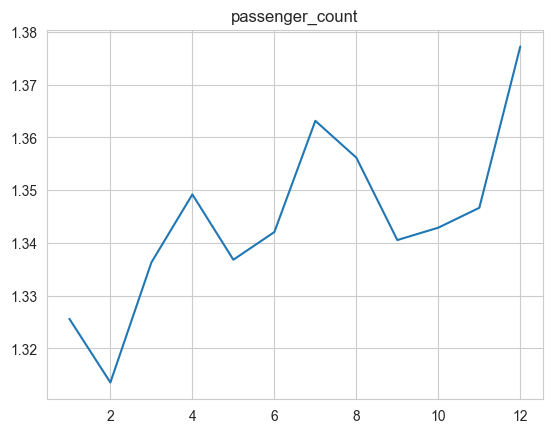

In [60]:
plt.plot(mensual_gr['passenger_trip'])
plt.title('passenger_count')
plt.show()

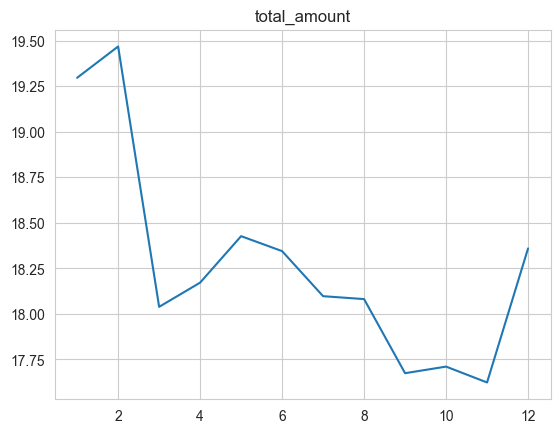

In [61]:
plt.plot(mensual_gr['total_trip'])
plt.title('total_amount')
plt.show()

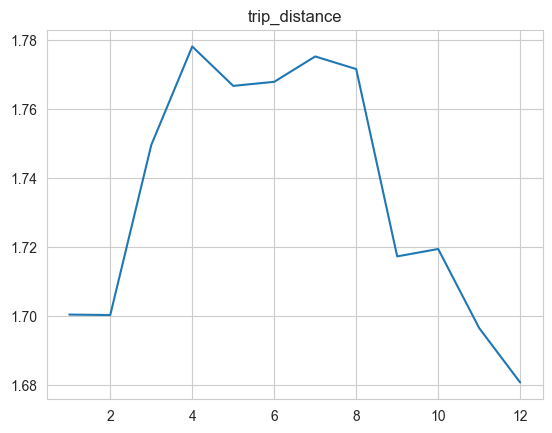

In [62]:
plt.plot(mensual_gr['distance_trip'])
plt.title('trip_distance')
plt.show()

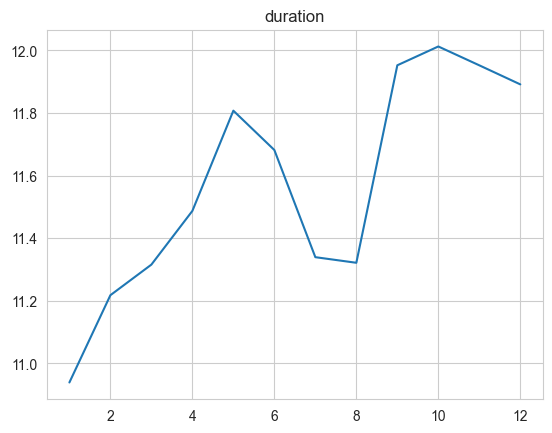

In [63]:
plt.plot(mensual_gr['duration_trip'])
plt.title('duration')
plt.show()